# Cell type correlation

We aimed to combine the genetic expression data with the cell fraction data to investigate the correlation between the cell types with the temporal progression of brain atrophic regions in MS

In [1]:
import pandas as pd

target_file_name = '../GO/negative/negative.xlsx'
target_dataframe = pd.read_excel(target_file_name, sheet_name=None)

gene_dataframe_1 = target_dataframe['GENE'][['Gene', 'full name', 'r']]
merged_dataframe = pd.read_csv('../data/id_label/result_for_All/merged_data_All.csv')
resultAll4 = pd.read_csv('../data/id_label/result_for_All/resultAll4.csv')
resultAll4

,probe_id,r,p,gene_symbol
0,1030058,0.511251,1.118908e-39,KLK8
1,1031532,0.502307,3.774471e-38,KCTD4
2,1036268,0.496801,3.128246e-37,SLC22A9
3,1053623,0.491904,1.986976e-36,NPPA
4,1054175,0.488538,6.959433e-36,MGP
...,...,...,...,...
19187,1031901,-0.454180,1.166416e-30,STAC2
19188,1048950,-0.460649,1.342670e-31,P2RX6
19189,1012216,-0.462936,6.182122e-32,NRG1
19190,1047615,-0.479382,1.964509e-34,RAMP3


In [2]:
gene_dataframe_1.head()

,Gene,full name,r
0,NEFL,"neurofilament, light polypeptide",-0.232705
1,NEFM,"neurofilament, medium polypeptide",-0.293475
2,NEFH,"neurofilament, heavy polypeptide",-0.380870
3,HLA-A,"major histocompatibility complex, class i, a",-0.174433
4,HLA-C,"major histocompatibility complex, class i, c",-0.198500


In [3]:
merged_dataframe.head()

,Unnamed: 0,well_id,original,lobes,regions,labels,EMB_regions,NM_regions,EBM_Stage,1058685,...,1071190,1071191,1071192,1071194,1071198,1071200,1071203,1071207,1071208,1071210
0,0,11063,116.0,Occipital_lobe,Cun_cuneus,116.0,Cuneus,Cun_cuneus,11,3.789570,...,2.710997,5.915190,2.728671,2.277213,7.515203,6.798809,5.330541,5.480807,5.674037,4.523316
1,1,11095,116.0,Occipital_lobe,Cun_cuneus,116.0,Cuneus,Cun_cuneus,11,4.400062,...,2.080074,5.960390,3.095870,2.992298,7.693174,6.708773,5.835969,5.621881,5.681032,4.588750
2,2,11142,116.0,Occipital_lobe,Cun_cuneus,116.0,Cuneus,Cun_cuneus,11,4.336360,...,2.518279,6.214643,2.696725,2.885913,7.570164,6.536117,5.208743,5.177075,5.733798,5.161416
3,3,126435015,116.0,Occipital_lobe,Cun_cuneus,116.0,Cuneus,Cun_cuneus,11,3.185858,...,3.795508,7.197855,4.010861,2.538049,8.709574,7.531392,5.579490,5.807951,6.715045,4.893156
4,4,126435043,116.0,Occipital_lobe,Cun_cuneus,116.0,Cuneus,Cun_cuneus,11,3.982522,...,3.532010,7.587387,4.642928,2.233732,9.671323,8.085911,5.310435,5.976924,7.557137,5.849953


In [4]:
gene_id = []
for i in gene_dataframe_1['Gene'].values:
    i_probe_id = resultAll4[resultAll4['gene_symbol'] == i]['probe_id'].values[0]
    gene_id.append(i_probe_id)
gene_dataframe_1['Gene_id'] = gene_id
gene_dataframe_1

IndexError: index 0 is out of bounds for axis 0 with size 0

In [5]:
wanted_columns = ['well_id'] + [str(i) for i in gene_id]
wanted_merged_data = merged_dataframe[wanted_columns]
wanted_merged_data

,well_id,1021076,1053768,1053765,1055687,1055681,1055683,1018090,1055644,1058905,...,1031901,1026994,1048791,1041158,1044257,1010809,1029219,1052202,1042405,1014981
0,11063,12.603207,16.732222,13.708235,8.335003,9.316482,11.209731,8.427628,8.304012,11.453280,...,10.312789,7.233330,7.418434,11.413415,5.575659,10.120659,10.075206,6.085920,11.765868,5.194157
1,11095,13.098748,16.956015,14.349142,8.792311,9.521288,11.322599,8.413755,8.749795,11.738017,...,10.953828,7.391833,7.612365,11.829424,5.556706,10.480601,10.286737,6.209961,12.270575,4.474606
2,11142,11.936979,15.329429,13.029692,8.033353,8.938530,11.091914,8.154951,7.932978,11.199226,...,10.331546,7.484269,7.569271,11.318651,4.936025,10.342682,9.552122,6.255337,11.856437,4.889369
3,126435015,11.154527,15.383394,13.329154,8.038036,9.002266,10.661299,7.836523,7.570180,11.391110,...,10.989428,7.354466,8.262276,11.128130,5.413674,10.006967,9.615954,6.805020,12.266637,4.921716
4,126435043,10.577790,14.961078,11.288560,8.225807,9.202277,10.933662,8.085739,7.784225,11.694576,...,9.754230,7.205782,7.587745,10.952255,5.173511,9.462655,10.453029,6.689414,11.624551,4.896937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,159226215,11.700814,15.676262,13.350457,7.964608,8.698503,10.658787,7.746280,8.005343,11.258100,...,10.324965,6.957168,7.317299,10.933299,5.929708,9.787839,10.015502,6.646186,12.010543,5.030337
572,561,11.764574,15.037547,12.085806,8.167033,8.831142,10.452817,8.164607,7.707914,10.937342,...,9.013104,6.981076,7.664143,10.878306,4.512376,9.881820,9.306410,6.281677,11.962207,4.822848
573,5168,12.420676,15.433131,13.758618,7.594390,8.663253,10.662673,7.874365,7.625334,10.875156,...,10.603653,7.865231,7.928550,11.366142,4.868228,10.117996,9.412631,6.018929,12.491148,4.457464
574,5194,11.511371,15.301143,13.485001,7.852415,8.583783,10.637041,8.053749,7.947772,11.066006,...,10.788378,7.040356,7.744231,11.559670,6.190875,10.290066,10.173972,5.111074,12.114464,4.708746


In [6]:
txt_file_name = 'celltype_deconvolution.txt'
with open(txt_file_name, 'r', encoding='utf-8') as f:
    column_line = f.readline().strip().split('\t')
    data = []
    index = []
    for line in f.readlines():
        line_data = line.strip().split('\t')
        index.append(int(line_data[0]))
        data.append([float(i) for i in line_data[1:]])
gene_dataframe_2 = pd.DataFrame(data, columns=column_line, index=index)
gene_dataframe_2.to_csv('cell_type.csv')

In [7]:
wanted_well_id = wanted_merged_data['well_id'].values
wanted_gene_df_2 = gene_dataframe_2.loc[wanted_well_id]
cell = wanted_gene_df_2

In [8]:
#matrix 1 * matrix 2
matrix_1 = wanted_merged_data.values[:, 1:]
matrix_2 = wanted_gene_df_2.values
print(matrix_1.shape)
print(matrix_2.shape)
import numpy as np
from sklearn.preprocessing import StandardScaler
score_matrix = np.matmul(matrix_2.T, matrix_1)
scaler = StandardScaler()
score_matrix_normed = scaler.fit_transform(score_matrix)
import matplotlib.pyplot as plt

score_matrix_df = pd.DataFrame(score_matrix, columns=wanted_merged_data.columns[1:], index=wanted_gene_df_2.columns)
score_matrix_df

(576, 65)
(576, 8)


,1021076,1053768,1053765,1055687,1055681,1055683,1018090,1055644,1058905,1055687,...,1031901,1026994,1048791,1041158,1044257,1010809,1029219,1052202,1042405,1014981
Unknown,22.694712,30.024474,24.678337,15.623470,17.349698,20.916939,15.429761,15.448921,22.062521,15.623470,...,19.027130,14.015265,14.669940,21.783938,10.099547,19.364508,18.911569,12.353263,23.659536,9.422400
InNeurons,1574.060436,2073.129207,1714.132721,1063.905681,1187.264078,1434.137138,1056.242106,1059.203789,1509.805551,1063.905681,...,1326.398693,973.625659,1014.419578,1499.649156,693.172306,1342.152432,1284.595755,854.304913,1638.765458,640.055176
Oligodendrocytes,677.524878,896.014532,741.230777,467.835135,519.528465,626.369391,461.406817,462.199495,659.927350,467.835135,...,572.683600,420.942024,437.755475,649.744664,306.966918,577.749193,568.260680,366.588915,705.497879,279.580401
Endothelial,387.171542,511.939367,421.757943,264.909897,294.569589,355.268398,262.114869,262.341755,374.285562,264.909897,...,325.892249,239.416007,250.428465,370.941515,171.314039,330.436049,320.071641,210.391808,403.644304,159.588058
Microglia,94.983388,125.261991,103.345600,65.076053,72.450235,87.439468,64.398317,64.635660,92.078235,65.076053,...,79.714322,58.760520,61.040769,90.827198,42.400082,80.927979,78.803564,51.491242,98.843711,39.075461
Astrocytes,677.572678,897.396309,733.745351,468.285499,518.947842,624.718178,461.418179,461.055065,659.419997,468.285499,...,565.824598,418.933832,440.591526,652.660797,299.262129,579.484505,565.025371,369.526804,708.247762,282.966470
OPC,52.061712,68.898906,56.525578,35.800962,39.793493,47.948085,35.367252,35.383834,50.599699,35.800962,...,43.639338,32.213836,33.692245,49.950348,23.073292,44.416692,43.340988,28.420094,54.305595,21.619045
ExNeurons,3173.110218,4178.768278,3443.915622,2139.413634,2385.107503,2882.092416,2122.861373,2126.864338,3034.647971,2139.413634,...,2664.072963,1961.362491,2042.934375,3021.577150,1387.282021,2704.375082,2580.344519,1719.157949,3304.907747,1286.864339


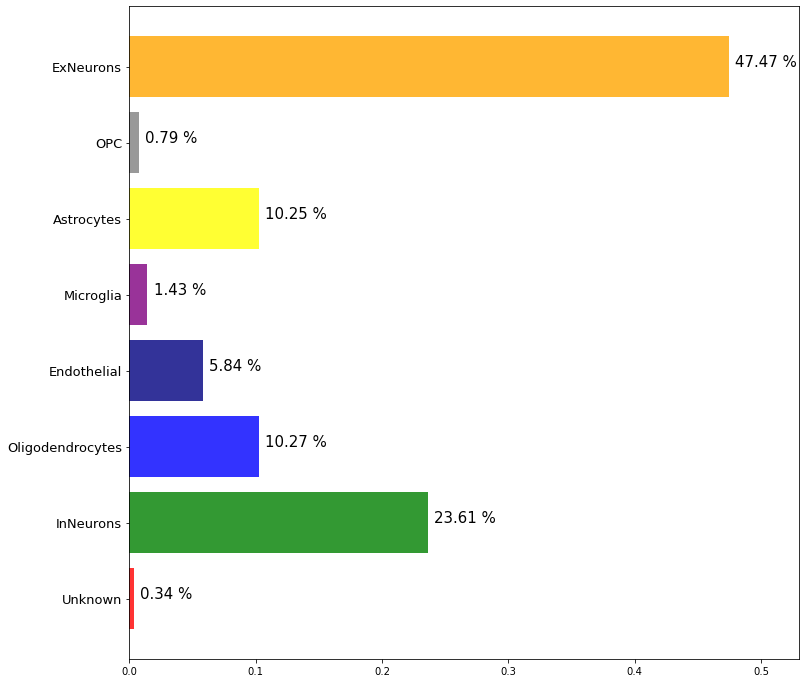

In [9]:
valid_index = [0, 1, 2, 3, 4, 5, 6, 7]
total_line_sum = np.sum(score_matrix_df.values, axis=1)
score_matrix_df['total_score'] = total_line_sum
total_score = sum(score_matrix_df['total_score'].values[valid_index])
score_matrix_df['total_score_rate'] = score_matrix_df['total_score']/total_score
score_matrix_df.iloc[[2,3,4,5,6]]
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(111)
bar_len = score_matrix_df['total_score_rate'].values[valid_index]
bar_name = np.array(list(score_matrix_df.index))[valid_index]

colors_list = ['r', 'g', 'b', 'navy', 'purple', 'yellow', 'gray', 'orange']
for index in range(len(bar_len)):
    plt.barh(index, bar_len[index], alpha=0.8, color=colors_list[index])
    plt.text(x=bar_len[index]+0.005, y=index, s='%.2f %%' % (bar_len[index]*100), fontsize=15)
plt.yticks(range(len(bar_len)), bar_name, fontsize=13)
plt.xlim(0, 0.53)
#plt.xlim(0, 0.42)
figure.savefig('outcome.png', dpi=300)

In [13]:
bar_len

array([0.00342251, 0.23644286, 0.10243272, 0.05833863, 0.01429878,
       0.10209674, 0.00784719, 0.47512056])